In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, ALL_TIMES,interpline, CoordPair, xy_to_ll, ll_to_xy)
import pandas as pd
import numpy as np
import os
import shutil
import re
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.ticker as mticker
import cartopy.crs as ccrs                                               
import cartopy.feature as cf
import matplotlib.pyplot as plt
import glob
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import shapefile
import geopandas as gpd
from matplotlib.backends.backend_pdf import PdfPages
from palettable.colorbrewer.diverging import RdYlBu_8_r
import palettable
import matplotlib as mpl

# information

In [2]:
ds_lu_2010s = xr.open_dataset('wrfout_d04_2011-06-23_11:00:00')
lu_2010s = ds_lu_2010s['LU_INDEX']

lu_2010s = lu_2010s[0,:,:]

In [3]:
ds_lu_2040s = xr.open_dataset('wrfout_d04_2040-06-18_23:00:00')
lu_2040s = ds_lu_2040s['LU_INDEX']

lu_2040s = lu_2040s[0,:,:]

# SSP245_2010s

2010s

In [4]:
#daytime
ssp245_2010s_day = pd.read_csv('t2_1120_ssp245_daymean.csv')
ssp245_2010s_day = ssp245_2010s_day.replace(9999,np.nan)

#nighttime
ssp245_2010s_night = pd.read_csv('t2_1120_ssp245_nightmean.csv')
ssp245_2010s_night = ssp245_2010s_night.replace(9999,np.nan)

In [5]:
#daytime
ssp245_2010s_day.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp245_2010s_day_values = ssp245_2010s_day.ssp245_t2_1120_era5_corrected.values 
ssp245_2010s_day_values = ssp245_2010s_day_values.reshape(162,213)

XLAT = lu_2010s.XLAT
XLONG = lu_2010s.XLONG
south_north = lu_2010s.south_north
west_east = lu_2010s.west_east

ssp245_2010s_day_xr = xr.DataArray(ssp245_2010s_day_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2010s_day = xr.Dataset({'ssp245_2010s_day_decadalmean': ssp245_2010s_day_xr})

In [6]:
#nighttime
ssp245_2010s_night.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp245_2010s_night_values = ssp245_2010s_night.ssp245_t2_1120_era5_corrected.values 
ssp245_2010s_night_values = ssp245_2010s_night_values.reshape(162,213)

XLAT = lu_2010s.XLAT
XLONG = lu_2010s.XLONG
south_north = lu_2010s.south_north
west_east = lu_2010s.west_east

ssp245_2010s_night_xr = xr.DataArray(ssp245_2010s_night_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2010s_night = xr.Dataset({'ssp245_2010s_night_decadalmean': ssp245_2010s_night_xr})

# SSP126

2040s

In [7]:
#daytime
ssp126_2040s_day = pd.read_csv('t2_4049_ssp126_daymean.csv')
ssp126_2040s_day = ssp126_2040s_day.replace(9999,np.nan)

#nighttime
ssp126_2040s_night = pd.read_csv('t2_4049_ssp126_nightmean.csv')
ssp126_2040s_night = ssp126_2040s_night.replace(9999,np.nan)

In [8]:
#daytime
ssp126_2040s_day.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp126_2040s_day_values = ssp126_2040s_day.ssp126_t2_4049_era5_corrected.values 
ssp126_2040s_day_values = ssp126_2040s_day_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

ssp126_2040s_day_xr = xr.DataArray(ssp126_2040s_day_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp126_2040s_day = xr.Dataset({'ssp126_2040s_day_decadalmean': ssp126_2040s_day_xr})

In [9]:
#nighttime
ssp126_2040s_night.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp126_2040s_night_values = ssp126_2040s_night.ssp126_t2_4049_era5_corrected.values 
ssp126_2040s_night_values = ssp126_2040s_night_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

ssp126_2040s_night_xr = xr.DataArray(ssp126_2040s_night_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp126_2040s_night = xr.Dataset({'ssp126_2040s_night_decadalmean': ssp126_2040s_night_xr})

2090s

In [10]:
#daytime
ssp126_2090s_day = pd.read_csv('t2_9099_ssp126_daymean.csv')
ssp126_2090s_day = ssp126_2090s_day.replace(9999,np.nan)

#nighttime
ssp126_2090s_night = pd.read_csv('t2_9099_ssp126_nightmean.csv')
ssp126_2090s_night = ssp126_2090s_night.replace(9999,np.nan)

In [11]:
#daytime
ssp126_2090s_day.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp126_2090s_day_values = ssp126_2090s_day.ssp126_t2_9099_era5_corrected.values 
ssp126_2090s_day_values = ssp126_2090s_day_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

ssp126_2090s_day_xr = xr.DataArray(ssp126_2090s_day_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp126_2090s_day = xr.Dataset({'ssp126_2090s_day_decadalmean': ssp126_2090s_day_xr})

In [12]:
#nighttime
ssp126_2090s_night.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp126_2090s_night_values = ssp126_2090s_night.ssp126_t2_9099_era5_corrected.values 
ssp126_2090s_night_values = ssp126_2090s_night_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

ssp126_2090s_night_xr = xr.DataArray(ssp126_2090s_night_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp126_2090s_night = xr.Dataset({'ssp126_2090s_night_decadalmean': ssp126_2090s_night_xr})

# SSP585

2040s

In [13]:
#daytime
ssp585_2040s_day = pd.read_csv('t2_4049_ssp585_daymean.csv')
ssp585_2040s_day = ssp585_2040s_day.replace(9999,np.nan)

#nighttime
ssp585_2040s_night = pd.read_csv('t2_4049_ssp585_nightmean.csv')
ssp585_2040s_night = ssp585_2040s_night.replace(9999,np.nan)

In [14]:
#daytime
ssp585_2040s_day.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp585_2040s_day_values = ssp585_2040s_day.ssp585_t2_4049_era5_corrected.values 
ssp585_2040s_day_values = ssp585_2040s_day_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

ssp585_2040s_day_xr = xr.DataArray(ssp585_2040s_day_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp585_2040s_day = xr.Dataset({'ssp585_2040s_day_decadalmean': ssp585_2040s_day_xr})

In [15]:
#nighttime
ssp585_2040s_night.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp585_2040s_night_values = ssp585_2040s_night.ssp585_t2_4049_era5_corrected.values 
ssp585_2040s_night_values = ssp585_2040s_night_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

ssp585_2040s_night_xr = xr.DataArray(ssp585_2040s_night_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp585_2040s_night = xr.Dataset({'ssp585_2040s_night_decadalmean': ssp585_2040s_night_xr})

2090s

In [16]:
#daytime
ssp585_2090s_day = pd.read_csv('t2_9099_ssp585_daymean.csv')
ssp585_2090s_day = ssp585_2090s_day.replace(9999,np.nan)

#nighttime
ssp585_2090s_night = pd.read_csv('t2_9099_ssp585_nightmean.csv')
ssp585_2090s_night = ssp585_2090s_night.replace(9999,np.nan)

In [17]:
#daytime
ssp585_2090s_day.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp585_2090s_day_values = ssp585_2090s_day.ssp585_t2_9099_era5_corrected.values 
ssp585_2090s_day_values = ssp585_2090s_day_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

ssp585_2090s_day_xr = xr.DataArray(ssp585_2090s_day_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp585_2090s_day = xr.Dataset({'ssp585_2090s_day_decadalmean': ssp585_2090s_day_xr})

In [18]:
#nighttime
ssp585_2090s_night.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp585_2090s_night_values = ssp585_2090s_night.ssp585_t2_9099_era5_corrected.values 
ssp585_2090s_night_values = ssp585_2090s_night_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

ssp585_2090s_night_xr = xr.DataArray(ssp585_2090s_night_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp585_2090s_night = xr.Dataset({'ssp585_2090s_night_decadalmean': ssp585_2090s_night_xr})

# plot

In [19]:
PRD = gpd.read_file('/home/zzuoaa/evaluation_CMIP6/May/fine_coastline/china_coastline.shp')

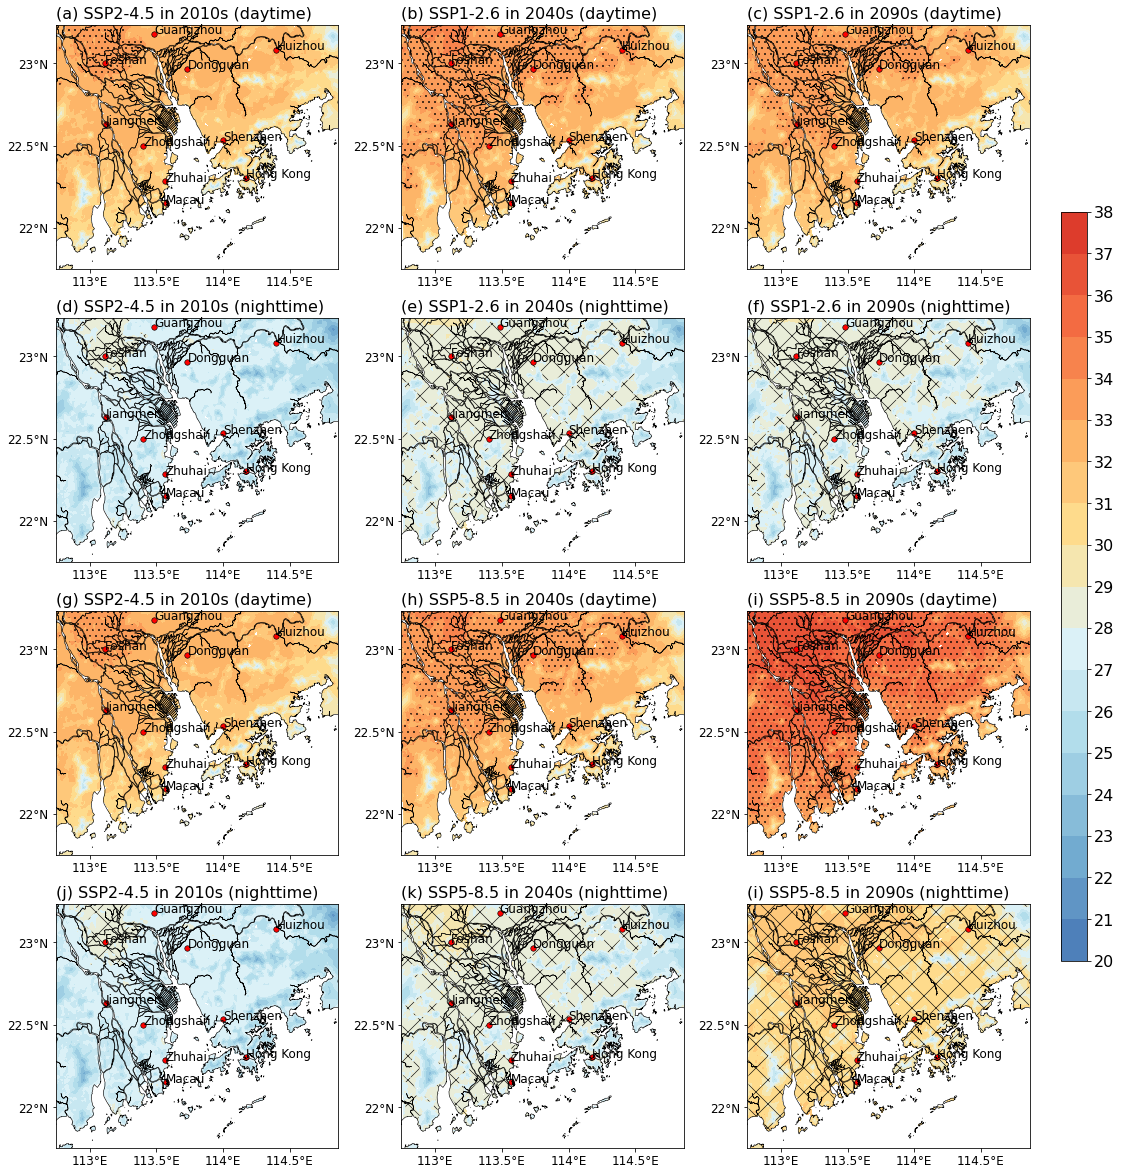

In [20]:

plt.rcParams["font.family"] = "DejaVu Sans"
font={'weight':'medium',
      'color':'black',
      'size':12}

fig,ax=plt.subplots(4,3,figsize=(18,26))
axes = ax.flatten()

var = locals()
for i in range(0,12):
    var['ax' + str(i+1)] = axes[i]

for i in range(0,12):
    var['ax' + str(i+1)] = PRD.geometry.plot(ax=var['ax' + str(i+1)],edgecolor='black',facecolor='none',linewidth=0.6,\
                                             linestyle='solid')



####################################     DAY     ###############################################
# C1 = ax1.contour(ds_ssp245_2010s_day.XLONG,ds_ssp245_2010s_day.XLAT,ds_ssp245_2010s_day.ssp245_2010s_day_decadalmean,\
#                  levels=[33],colors='red',linestyles=('solid'),linewidths=(1))
CF1 = ax1.contourf(ds_ssp245_2010s_day.XLONG,ds_ssp245_2010s_day.XLAT,ds_ssp245_2010s_day.ssp245_2010s_day_decadalmean,\
                   np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C1 = ax1.contourf(ds_ssp245_2010s_day.XLONG,ds_ssp245_2010s_day.XLAT,ds_ssp245_2010s_day.ssp245_2010s_day_decadalmean,\
                   [33,39],hatches=['..','x'],alpha=0)
# ax1.clabel(C1,inline=False,levels=[33],fontsize=15,colors='black',fmt="%.0f")

# C2 = ax2.contour(ds_ssp126_2040s_day.XLONG,ds_ssp126_2040s_day.XLAT,ds_ssp126_2040s_day.ssp126_2040s_day_decadalmean,\
#                  levels=[33],colors='red',linestyles=('solid'),linewidths=(1))
CF2 = ax2.contourf(ds_ssp126_2040s_day.XLONG,ds_ssp126_2040s_day.XLAT,ds_ssp126_2040s_day.ssp126_2040s_day_decadalmean,\
                   np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C2 = ax2.contourf(ds_ssp126_2040s_day.XLONG,ds_ssp126_2040s_day.XLAT,ds_ssp126_2040s_day.ssp126_2040s_day_decadalmean,\
                   [33,39],hatches=['..','x'],alpha=0)
# ax2.clabel(C2,inline=False,levels=[33],fontsize=15,colors='black',fmt="%.0f")

# C3 = ax3.contour(ds_ssp126_2090s_day.XLONG,ds_ssp126_2090s_day.XLAT,ds_ssp126_2090s_day.ssp126_2090s_day_decadalmean,\
#                  levels=[33],colors='red',linestyles=('solid'),linewidths=(1))
CF3 = ax3.contourf(ds_ssp126_2090s_day.XLONG,ds_ssp126_2090s_day.XLAT,ds_ssp126_2090s_day.ssp126_2090s_day_decadalmean,\
                   np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C3 = ax3.contourf(ds_ssp126_2090s_day.XLONG,ds_ssp126_2090s_day.XLAT,ds_ssp126_2090s_day.ssp126_2090s_day_decadalmean,\
                   [33,39],hatches=['..','x'],alpha=0)
# ax3.clabel(C3,inline=False,levels=[31],fontsize=15,colors='black',fmt="%.0f")

####################################     NIGHT     ###############################################
# C4 = ax4.contour(ds_ssp245_2010s_night.XLONG,ds_ssp245_2010s_night.XLAT,ds_ssp245_2010s_night.ssp245_2010s_night_decadalmean,\
#                  levels=[28],colors='royalblue',linestyles=('solid'),linewidths=(1))
CF4 = ax4.contourf(ds_ssp245_2010s_night.XLONG,ds_ssp245_2010s_night.XLAT,ds_ssp245_2010s_night.ssp245_2010s_night_decadalmean,\
                   np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C4 = ax4.contourf(ds_ssp245_2010s_night.XLONG,ds_ssp245_2010s_night.XLAT,ds_ssp245_2010s_night.ssp245_2010s_night_decadalmean,\
                   [28,39],hatches=['x','x'],alpha=0)

# C5 = ax5.contour(ds_ssp126_2040s_night.XLONG,ds_ssp126_2040s_night.XLAT,ds_ssp126_2040s_night.ssp126_2040s_night_decadalmean,\
#                  levels=[28],colors='royalblue',linestyles=('solid'),linewidths=(1))
CF5 = ax5.contourf(ds_ssp126_2040s_night.XLONG,ds_ssp126_2040s_night.XLAT,ds_ssp126_2040s_night.ssp126_2040s_night_decadalmean,\
                   np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C5 = ax5.contourf(ds_ssp126_2040s_night.XLONG,ds_ssp126_2040s_night.XLAT,ds_ssp126_2040s_night.ssp126_2040s_night_decadalmean,\
                   [28,39],hatches=['x','x'],alpha=0)

# C6 = ax6.contour(ds_ssp126_2090s_night.XLONG,ds_ssp126_2090s_night.XLAT,ds_ssp126_2090s_night.ssp126_2090s_night_decadalmean,\
#                  levels=[28],colors='royalblue',linestyles=('solid'),linewidths=(1))
CF6 = ax6.contourf(ds_ssp126_2090s_night.XLONG,ds_ssp126_2090s_night.XLAT,ds_ssp126_2090s_night.ssp126_2090s_night_decadalmean,\
                   np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C6 = ax6.contourf(ds_ssp126_2090s_night.XLONG,ds_ssp126_2090s_night.XLAT,ds_ssp126_2090s_night.ssp126_2090s_night_decadalmean,\
                   [28,39],hatches=['x','x'],alpha=0)
####################################     DAY     ###############################################
# C7 = ax7.contour(ds_ssp245_2010s_day.XLONG,ds_ssp245_2010s_day.XLAT,ds_ssp245_2010s_day.ssp245_2010s_day_decadalmean,\
#                  levels=[33],colors='red',linestyles=('solid'),linewidths=(1))
CF7 = ax7.contourf(ds_ssp245_2010s_day.XLONG,ds_ssp245_2010s_day.XLAT,ds_ssp245_2010s_day.ssp245_2010s_day_decadalmean,\
                   np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C7 = ax7.contourf(ds_ssp245_2010s_day.XLONG,ds_ssp245_2010s_day.XLAT,ds_ssp245_2010s_day.ssp245_2010s_day_decadalmean,\
                   [33,39],hatches=['..','x'],alpha=0)

# C8 = ax8.contour(ds_ssp585_2040s_day.XLONG,ds_ssp585_2040s_day.XLAT,ds_ssp585_2040s_day.ssp585_2040s_day_decadalmean,\
#                  levels=[33],colors='red',linestyles=('solid'),linewidths=(1))
CF8 = ax8.contourf(ds_ssp585_2040s_day.XLONG,ds_ssp585_2040s_day.XLAT,ds_ssp585_2040s_day.ssp585_2040s_day_decadalmean,\
                   np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C8 = ax8.contourf(ds_ssp585_2040s_day.XLONG,ds_ssp585_2040s_day.XLAT,ds_ssp585_2040s_day.ssp585_2040s_day_decadalmean,\
                   [33,39],hatches=['..','x'],alpha=0)

# C9 = ax9.contour(ds_ssp585_2090s_day.XLONG,ds_ssp585_2090s_day.XLAT,ds_ssp585_2090s_day.ssp585_2090s_day_decadalmean,\
#                  levels=[33],colors='red',linestyles=('solid'),linewidths=(1))
CF9 = ax9.contourf(ds_ssp585_2090s_day.XLONG,ds_ssp585_2090s_day.XLAT,ds_ssp585_2090s_day.ssp585_2090s_day_decadalmean,\
                   np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C9 = ax9.contourf(ds_ssp585_2090s_day.XLONG,ds_ssp585_2090s_day.XLAT,ds_ssp585_2090s_day.ssp585_2090s_day_decadalmean,\
                   [33,39],hatches=['..','x'],alpha=0)

####################################     NIGHT     ###############################################
# C10 = ax10.contour(ds_ssp245_2010s_night.XLONG,ds_ssp245_2010s_night.XLAT,ds_ssp245_2010s_night.ssp245_2010s_night_decadalmean,\
#                    levels=[28],colors='royalblue',linestyles=('solid'),linewidths=(1))
CF10 = ax10.contourf(ds_ssp245_2010s_night.XLONG,ds_ssp245_2010s_night.XLAT,ds_ssp245_2010s_night.ssp245_2010s_night_decadalmean,\
                     np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C10 = ax10.contourf(ds_ssp245_2010s_night.XLONG,ds_ssp245_2010s_night.XLAT,ds_ssp245_2010s_night.ssp245_2010s_night_decadalmean,\
                   [28,39],hatches=['x','x'],alpha=0)

# C11 = ax11.contour(ds_ssp585_2040s_night.XLONG,ds_ssp585_2040s_night.XLAT,ds_ssp585_2040s_night.ssp585_2040s_night_decadalmean,\
#                    levels=[28],colors='royalblue',linestyles=('solid'),linewidths=(1))
CF11 = ax11.contourf(ds_ssp585_2040s_night.XLONG,ds_ssp585_2040s_night.XLAT,ds_ssp585_2040s_night.ssp585_2040s_night_decadalmean,\
                     np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C11 = ax11.contourf(ds_ssp585_2040s_night.XLONG,ds_ssp585_2040s_night.XLAT,ds_ssp585_2040s_night.ssp585_2040s_night_decadalmean,\
                   [28,39],hatches=['x','x'],alpha=0)

# C12 = ax12.contour(ds_ssp585_2090s_night.XLONG,ds_ssp585_2090s_night.XLAT,ds_ssp585_2090s_night.ssp585_2090s_night_decadalmean,\
#                    levels=[28],colors='royalblue',linestyles=('solid'),linewidths=(1))
CF12 = ax12.contourf(ds_ssp585_2090s_night.XLONG,ds_ssp585_2090s_night.XLAT,ds_ssp585_2090s_night.ssp585_2090s_night_decadalmean,\
                     np.arange(20, 39, 1),cmap=RdYlBu_8_r.mpl_colormap)
C12 = ax12.contourf(ds_ssp585_2090s_night.XLONG,ds_ssp585_2090s_night.XLAT,ds_ssp585_2090s_night.ssp585_2090s_night_decadalmean,\
                   [28,39],hatches=['x','x'],alpha=0)

###############################################################添加marker
obs_gd = pd.read_csv('/home/zzuoaa/evaluation_CMIP6/May/city_name.csv')


station_name = obs_gd.city

sc1 = ax1.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc2 = ax2.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc3 = ax3.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc4 = ax4.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc5 = ax5.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc6 = ax6.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc7 = ax7.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc8 = ax8.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc9 = ax9.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc10 = ax10.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc11 = ax11.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)
sc12 = ax12.scatter(obs_gd.lon,obs_gd.lat, s=30, c='red',\
                  edgecolors='black',linewidths=0.6)


for i in range(len(obs_gd.lon)):
    ax1.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax2.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax3.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax4.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax5.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax6.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax7.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax8.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax9.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax10.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax11.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
    ax12.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12)
###############################################################添加marker

fig.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0, 
                    hspace=0.2)

position = fig.add_axes([0.9, 0.3, 0.02, 0.4])#位置[左,下,右,上]
cb = fig.colorbar(CF1, cax=position)
cb.set_label('',fontdict=font)
cb.set_ticks(np.arange(20, 39, 1))
cb.ax.tick_params(labelsize=16) 


for i in range(0,12):
    var['ax' + str(i+1)].set_xlim([112.74554443, 114.86462402])
    var['ax' + str(i+1)].set_ylim([21.75164032, 23.23461723])
    var['ax' + str(i+1)].set_xticks([113,113.5,114,114.5])
    var['ax' + str(i+1)].set_yticks([22,22.5,23])
    var['ax' + str(i+1)].set_xticklabels([113,113.5,114,114.5], fontdict=font) 
    var['ax' + str(i+1)].set_yticklabels([22,22.5,23], fontdict=font)
    var['ax' + str(i+1)].xaxis.set_major_formatter(LongitudeFormatter())#刻度格式转换为经纬度样式                       
    var['ax' + str(i+1)].yaxis.set_major_formatter(LatitudeFormatter())                       


plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
mpl.rcParams['hatch.linewidth'] = 0.6  # previous pdf hatch linewidth
mpl.rcParams['hatch.linewidth'] = 0.6  # previous svg hatch linewidth
mpl.rcParams['hatch.color']='black'

ax1.set_title('(a) SSP2-4.5 in 2010s (daytime)', fontsize=16, color='black',loc='left')
ax2.set_title('(b) SSP1-2.6 in 2040s (daytime)', fontsize=16, color='black',loc='left')
ax3.set_title('(c) SSP1-2.6 in 2090s (daytime)', fontsize=16, color='black',loc='left')
ax4.set_title('(d) SSP2-4.5 in 2010s (nighttime)', fontsize=16, color='black',loc='left')
ax5.set_title('(e) SSP1-2.6 in 2040s (nighttime)', fontsize=16, color='black',loc='left')
ax6.set_title('(f) SSP1-2.6 in 2090s (nighttime)', fontsize=16, color='black',loc='left')
ax7.set_title('(g) SSP2-4.5 in 2010s (daytime)', fontsize=16, color='black',loc='left')
ax8.set_title('(h) SSP5-8.5 in 2040s (daytime)', fontsize=16, color='black',loc='left')
ax9.set_title('(i) SSP5-8.5 in 2090s (daytime)', fontsize=16, color='black',loc='left')
ax10.set_title('(j) SSP2-4.5 in 2010s (nighttime)', fontsize=16, color='black',loc='left')
ax11.set_title('(k) SSP5-8.5 in 2040s (nighttime)', fontsize=16, color='black',loc='left')
ax12.set_title('(i) SSP5-8.5 in 2090s (nighttime)', fontsize=16, color='black',loc='left')

plt.show()
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/figs/fig1_decadal_mean_temp/fig2_ssp126_ssp585.pdf',bbox_inches='tight')
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/figs/fig1_decadal_mean_temp/fig2_ssp126_ssp585.png',bbox_inches='tight',dpi=300)
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/figs/fig1_decadal_mean_temp/fig2_ssp126_ssp585.eps',bbox_inches='tight',dpi=300,format='eps')

# calculation

In [19]:
print(ds_ssp245_2010s_day.mean())
print(ds_ssp245_2010s_night.mean())

print(ds_ssp126_2040s_day.mean())
print(ds_ssp585_2040s_day.mean())
print(ds_ssp126_2040s_night.mean())
print(ds_ssp585_2040s_night.mean())

print(ds_ssp126_2090s_day.mean())
print(ds_ssp585_2090s_day.mean())
print(ds_ssp126_2090s_night.mean())
print(ds_ssp585_2090s_night.mean())

<xarray.Dataset>
Dimensions:                       ()
Data variables:
    ssp245_2010s_day_decadalmean  float64 31.54
<xarray.Dataset>
Dimensions:                         ()
Data variables:
    ssp245_2010s_night_decadalmean  float64 26.85
<xarray.Dataset>
Dimensions:                       ()
Data variables:
    ssp126_2040s_day_decadalmean  float64 32.27
<xarray.Dataset>
Dimensions:                       ()
Data variables:
    ssp585_2040s_day_decadalmean  float64 32.33
<xarray.Dataset>
Dimensions:                         ()
Data variables:
    ssp126_2040s_night_decadalmean  float64 27.85
<xarray.Dataset>
Dimensions:                         ()
Data variables:
    ssp585_2040s_night_decadalmean  float64 27.94
<xarray.Dataset>
Dimensions:                       ()
Data variables:
    ssp126_2090s_day_decadalmean  float64 32.01
<xarray.Dataset>
Dimensions:                       ()
Data variables:
    ssp585_2090s_day_decadalmean  float64 34.61
<xarray.Dataset>
Dimensions:                

In [20]:
print(ssp245_2010s_day[ssp245_2010s_day['ssp245_t2_1120_era5_corrected']>=33]['ssp245_t2_1120_era5_corrected'].count())

print(ssp245_2010s_night[ssp245_2010s_night['ssp245_t2_1120_era5_corrected']>=28]['ssp245_t2_1120_era5_corrected'].count())

1361
1198


In [21]:
print(ssp126_2040s_day[ssp126_2040s_day['ssp126_t2_4049_era5_corrected']>=33]['ssp126_t2_4049_era5_corrected'].count())

print(ssp126_2040s_night[ssp126_2040s_night['ssp126_t2_4049_era5_corrected']>=28]['ssp126_t2_4049_era5_corrected'].count())

7695
11834


In [22]:
print(ssp585_2040s_day[ssp585_2040s_day['ssp585_t2_4049_era5_corrected']>=33]['ssp585_t2_4049_era5_corrected'].count())

print(ssp585_2040s_night[ssp585_2040s_night['ssp585_t2_4049_era5_corrected']>=28]['ssp585_t2_4049_era5_corrected'].count())

8044
12505


In [23]:
print(ssp126_2090s_day[ssp126_2090s_day['ssp126_t2_9099_era5_corrected']>=33]['ssp126_t2_9099_era5_corrected'].count())

print(ssp126_2090s_night[ssp126_2090s_night['ssp126_t2_9099_era5_corrected']>=28]['ssp126_t2_9099_era5_corrected'].count())

5558
10327


In [24]:
print(ssp585_2090s_day[ssp585_2090s_day['ssp585_t2_9099_era5_corrected']>=33]['ssp585_t2_9099_era5_corrected'].count())

print(ssp585_2090s_night[ssp585_2090s_night['ssp585_t2_9099_era5_corrected']>=28]['ssp585_t2_9099_era5_corrected'].count())

18147
20255
